# Lab 6 - Exoplanet Detection

## Patrick Selep

## Abstract

Based on the signal to noise ratio we are able to achieve with our telescope and camera and the demographics of the exoplanets that are suitable for ground based detection an assessment was made to verify quanitatively that it is possible to detect exoplanet transits. 

## Signal to Noise Ratio

Data was taken from observations previously made of open clusters in B and R filters.
The clusters observed were selected based on monthly recommendations from SkyMaps.com.
The observations were made on 2/27/2020 and 2/28/2020 with the UWM 14" telescope and CCD camera.
Astrometry.net was used to obtain astrometric solutions for each image.

AstroImageJ (AIJ) was used extensively to calibrate the images with bias, dark and flat field images.
AIJ also created a Seeing Profile where the FWHM was found to be 9.18 pixels or 5.49 arcsec.
AIJ's Multi-Aperature functionality was used to select stars to analyze and plot on the diagram.


A pair of images from the M35 cluster in each filter was then analyzed and flux measurements taken.
The flux error measurements were also recorded and output with the measurement table for one hundred stars.
From these a profile of the signal to noise ratio as a function of magnitude was produced.
A curve was fit to this data so that the signal to noise ratio could be predicted for stars of any magnitude.


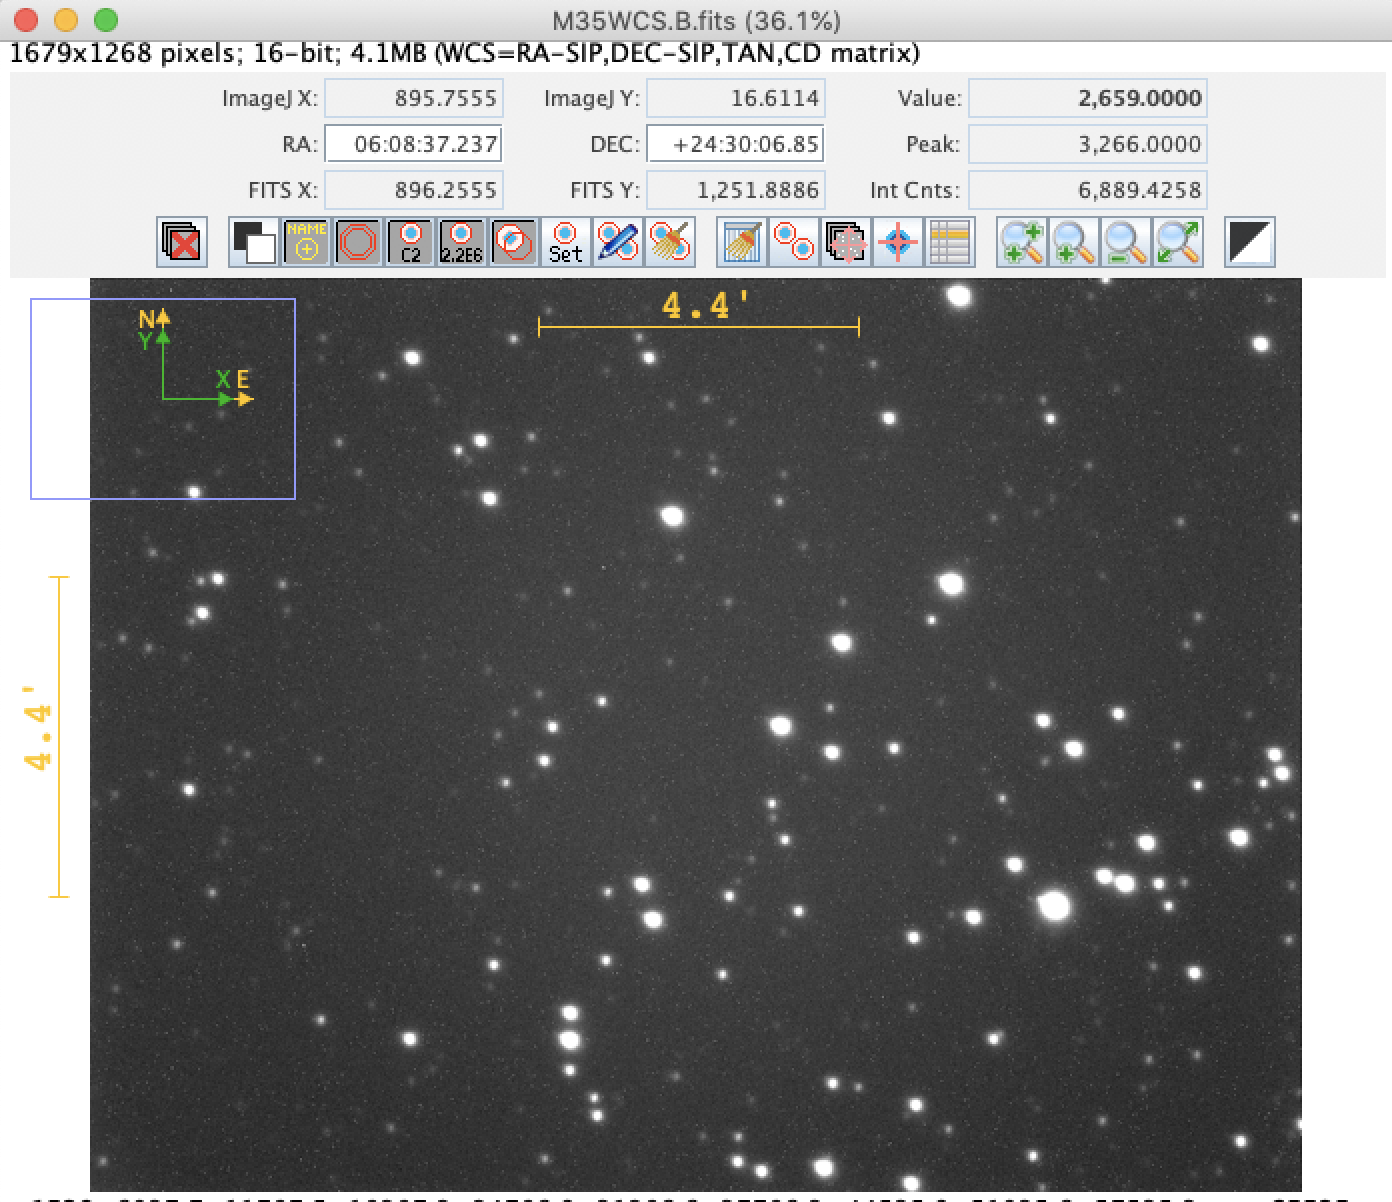



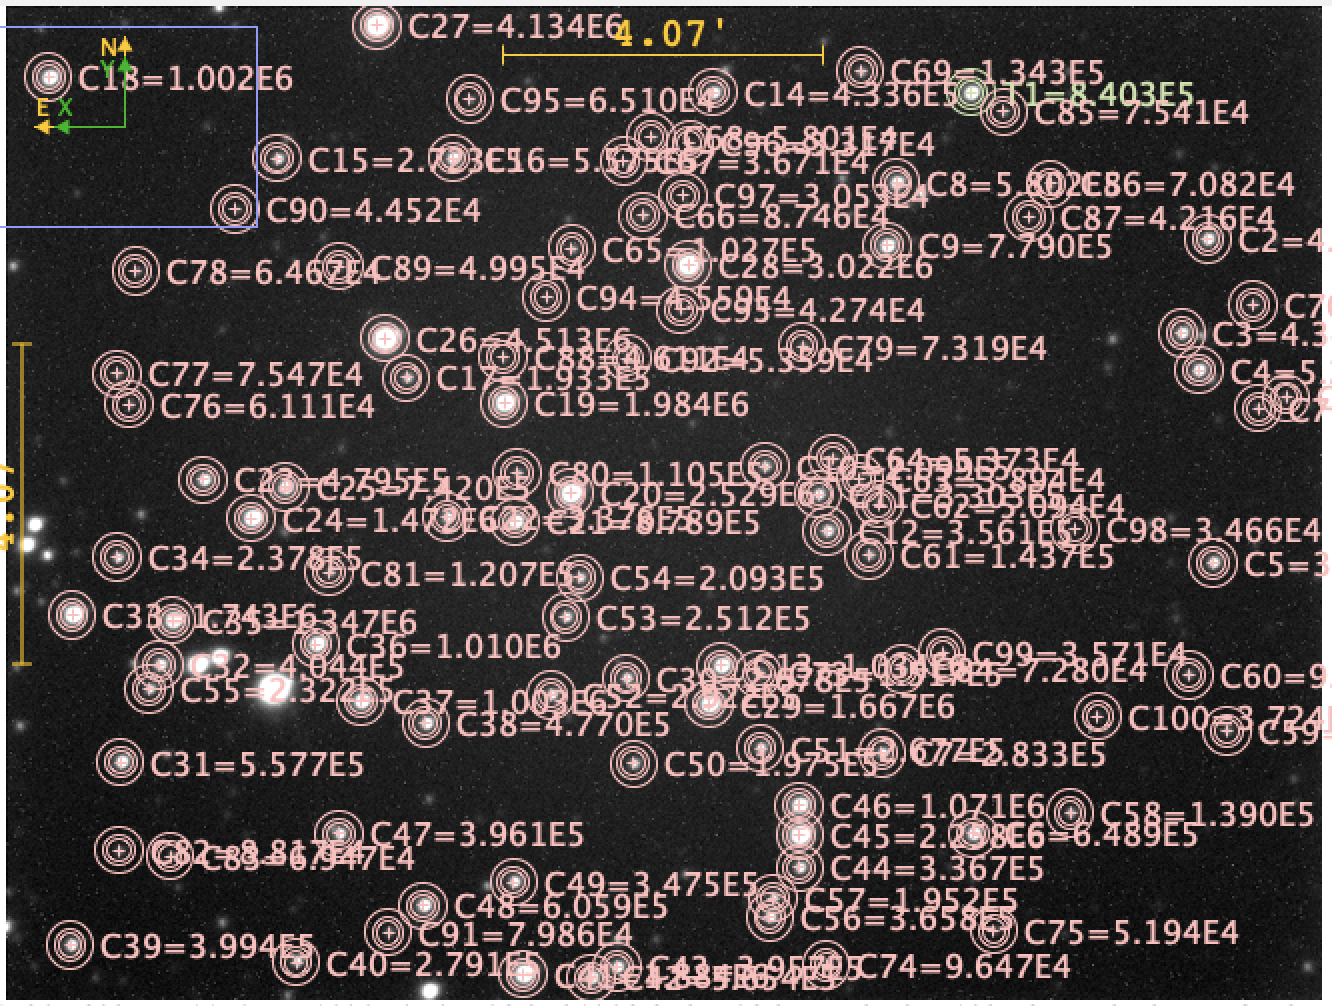



# Python code

In [16]:
from astropy.io import fits
from os import walk
from matplotlib import pyplot as plt

import numpy as np
from scipy import stats

In [17]:
data = np.genfromtxt(fname="100MeasurementsM35Br.tsv", delimiter="\t", skip_header=1, filling_values=1)  # change filling_values as req'd to fill in missing values

print(data.shape)  # (200,100)

(2, 717)


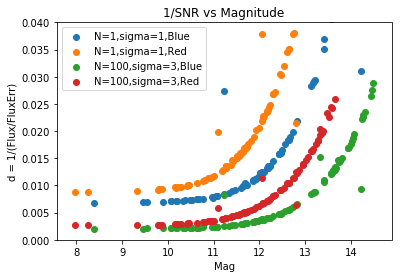

In [18]:
FluxB = (data[0,15:115])
FluxErrB = (data[0,115:215])
Fluxr = (data[1,15:115])
FluxErrr = (data[1,115:215])
#print(FluxB,FluxErrB)
#plt.scatter(FluxB,FluxErrB)
#plt.scatter(Fluxr,FluxErrr)
#plt.show()

MagRefB = (data[0,217])
MagRefB = np.append(MagRefB,data[0,223:716:5])
MagRefr = (data[1,217])
MagRefr = np.append(MagRefr,data[1,223:716:5])

plt.scatter(MagRefB,(FluxErrB/FluxB),label='N=1,sigma=1,Blue')
plt.scatter(MagRefr,(FluxErrr/Fluxr),label='N=1,sigma=1,Red')
plt.scatter(MagRefB,((FluxErrB/FluxB)/np.sqrt(100)*3),label='N=100,sigma=3,Blue')
plt.scatter(MagRefr,((FluxErrr/Fluxr)/np.sqrt(100)*3),label='N=100,sigma=3,Red')
plt.ylim(0,0.04)
plt.title('1/SNR vs Magnitude')
plt.xlabel('Mag')
plt.ylabel('d = 1/(Flux/FluxErr)')
plt.legend()
plt.show()

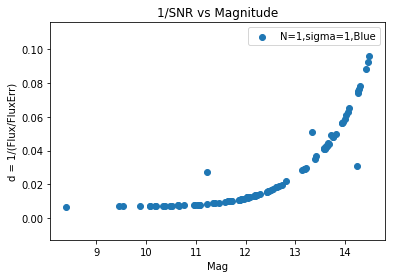

Exponential on the raw data
pre-exponential factor = 0.0000000654 (+/-) 0.0000107066
rate constant = 0.9718 (+/-) 11.3949
yintercept = 0.0054 (+/-) 0.2309


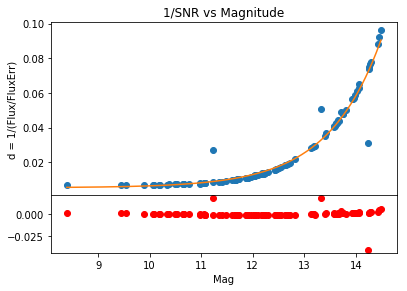

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scypy
from astropy.stats import sigma_clipped_stats
from scipy import stats

def exponential(x, a, k, b):
    return a*np.exp(x*k) + b

plt.scatter(MagRefB,(FluxErrB/FluxB),label='N=1,sigma=1,Blue')
plt.title('1/SNR vs Magnitude')
plt.xlabel('Mag')
plt.ylabel('d = 1/(Flux/FluxErr)')
plt.legend()
plt.show()

fig = plt.figure()

x = MagRefB
y = (FluxErrB/FluxB)

mean, median, std = sigma_clipped_stats(y)

popt_UncVsD, pcov_UncVsD = scypy.optimize.curve_fit(exponential, x, y, p0=[1, 1, 0], absolute_sigma=True)
perr_UncVsD = np.sqrt(np.diag(pcov_UncVsD))
print ("Exponential on the raw data")
#print (popt_exponential, pcov_exponential)
print ("pre-exponential factor = %0.10f (+/-) %0.10f" % (popt_UncVsD[0], perr_UncVsD[0]))
print ("rate constant = %0.4f (+/-) %0.4f" %(popt_UncVsD[1], perr_UncVsD[1]))
print ("yintercept = %0.4f (+/-) %0.4f" %(popt_UncVsD[2], perr_UncVsD[2]))

xtest = np.linspace(min(x),max(x),3969)
testy = (popt_UncVsD[0]*np.exp(xtest*popt_UncVsD[1]) + popt_UncVsD[2])
diffy = (popt_UncVsD[0]*np.exp(x*popt_UncVsD[1]) + popt_UncVsD[2])

#plt.subplot(2, 2, 1)
frame1=fig.add_axes((.1,.3,.8,.6))
plt.plot(x, y, linestyle = 'None', marker = 'o')
plt.plot(xtest,testy)
plt.title('1/SNR vs Magnitude')
plt.ylabel('d = 1/(Flux/FluxErr)')

#Residual plot
difference = y - diffy
frame2=fig.add_axes((.1,.1,.8,.2))        
plt.plot(x,difference,'or')
plt.xlabel('Mag')
plt.show()



## Exoplanet Data

A list of exoplanets suitable for ground based observation was obtained from the AAVSO website, https://www.aavso.org/exoplanet-section.

According to the AAVSO this target list was derived using the following criteria for each exoplanet:

    It is a confirmed, transiting exoplanet.
    
    It is the first planet discovered in a multi-planetary system (i.e., with the suffix “b”);

    Its orbital period is less than three (3) days.

    Its V magnitude is brighter than magnitude 14.

    Its transit depth is greater than 0.5% (i.e., 5 parts-per-thousand, or 5 mmag).

Based on the magnitude the exoplanet the single observation signal to noise ratio was calulated. The single exposure signal to noise ratios were calculated based on the blue filter as it had slightly better performance than the red. Based on the duration of the transit this SNR ratio was divided by the square root of the number of exposures possible to obtain the transit's signal to noise ratio. A two minute exposure was assumed based on experience with the typical observation and seeing conditions.

# Number of exposures

$\text{The number of exposures, } NumExp \text{, was calculated as follows:}$

$${NumExp} = {Duration} \text{ * 60 minutes / 2 minutes per exposure}$$

# Transit Signal to Noise Ratio

$\text{The Transit Signal to Noise Ratio, } SNR_{Transit} \text{, was calculated as follows:}$

$${SNR_{Transit}} = {SNR_{Exposure}}/\sqrt{NumExp}$$


## Python Code


In [20]:
import fileinput

data = np.genfromtxt(fname="addAAVSOTargetList.tsv", delimiter="\t", skip_header=1, filling_values=1)  # change filling_values as req'd to fill in missing values

print("Catalog data shows",data.shape[0],"exoplanets.")


Header = np.array([0])
UncDat = (popt_UncVsD[0]*np.exp((data[:,3])*popt_UncVsD[1]) + popt_UncVsD[2])
UncDat = np.append(Header, UncDat)
      
for fl, line in zip(UncDat, fileinput.input(['addAAVSOTargetList.tsv'], inplace=True)):
    print(line.strip() + '\t' + str(fl))
fileinput.close()
#Header = np.array([0])
ExpDat = (data[:,8]*60)/2
numExp = np.append(Header, ExpDat)
      
for fl, line in zip(numExp, fileinput.input(['addAAVSOTargetList.tsv'], inplace=True)):
    print(line.strip() + '\t' + str(fl))
fileinput.close()
#Header = np.array([0])
UncTst = ((popt_UncVsD[0]*np.exp((data[:,3])*popt_UncVsD[1]) + popt_UncVsD[2])/(np.sqrt(data[:,8]*60/2)))
UncTst = np.append(Header, UncTst)
      
for fl, line in zip(UncTst, fileinput.input(['addAAVSOTargetList.tsv'], inplace=True)):
    print(line.strip() + '\t' + str(fl))
fileinput.close()
#Header = np.array([0])
UncVsD = ((data[:,10]/1000)/((popt_UncVsD[0]*np.exp((data[:,3])*popt_UncVsD[1]) + popt_UncVsD[2])/(np.sqrt(data[:,8]*60/2))))
UncVsD = np.append(Header, UncVsD)
      
for fl, line in zip(UncVsD, fileinput.input(['addAAVSOTargetList.tsv'], inplace=True)):
    print(line.strip() + '\t' + str(fl))

fileinput.close()

Catalog data shows 68 exoplanets.


(68, 15)
Catalog data shows 68 stars in this field.


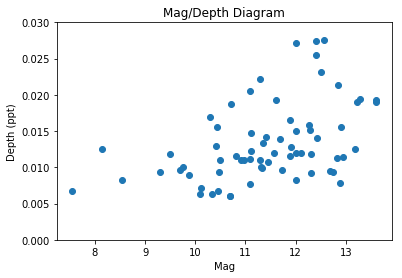

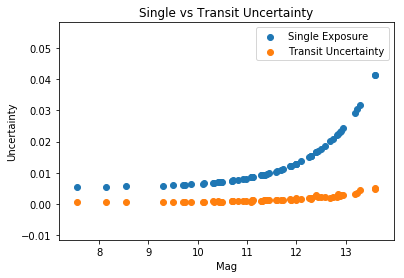

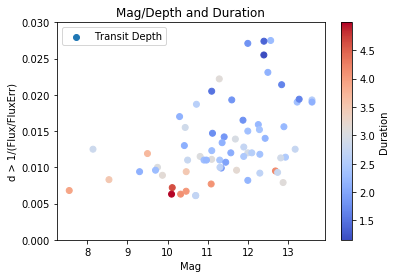

In [23]:
adta = np.genfromtxt(fname="addAAVSOTargetList.tsv", delimiter="\t", skip_header=1, filling_values=1)  # change filling_values as req'd to fill in missing values

print(adta.shape)  # (200,100)
#print(data)

#cata = np.genfromtxt(fname="M35Catalog.tsv", delimiter="\t", skip_header=1, filling_values=1)  # change filling_values as req'd to fill in missing values

print("Catalog data shows",adta.shape[0],"stars in this field.")

deladray = (adta[:,10])/1000
Magadray = (adta[:,3])
Duradray = (adta[:,8])
Uncadray = (adta[:,11])
UncTdray = (adta[:,13])
UncVdray = (adta[:,14])
#YErrArray = (data[2:1767,14])
#plt.scatter(b_vArray,MagArray)
plt.scatter(Magadray,deladray)
#plt.errorbar(delArray,MagArray,xerr=XErrArray, yerr=YErrArray, fmt='o')
#plt.errorbar((-2.5*np.log10((1-(delArray))/1000000)),MagArray,xerr=XErrArray, yerr=YErrArray, fmt='o')
#print(MagArray, delArray),
#print(YErrArray, XErrArray),
#plt.gca().invert_yaxis()
#plt.xlim(-.01,.2)
#plt.ylim(16,4)
plt.title("Mag/Depth Diagram")
plt.ylabel("Depth (ppt)")
plt.xlabel("Mag")
plt.ylim(0,0.03)
plt.savefig("ExoMagDepth.png")
plt.show()

#plt.scatter(MagRefB,(FluxErrB/FluxB),label='N=1,sigma=1,Blue')
plt.scatter(Magadray,Uncadray,label='Single Exposure')
plt.scatter(Magadray,UncTdray,label='Transit Uncertainty')
plt.title("Single vs Transit Uncertainty")
plt.ylabel("Uncertainty")
plt.xlabel("Mag")
#plt.ylim(0,0.03)
plt.savefig("ExoMagDepth.png")
plt.legend()
plt.show()

#plt.scatter(MagRefB,(FluxErrB))
#plt.scatter(Magadray,UncTdray,label='Transit Uncertainty')
#plt.scatter(Magadray,UncVdray,label='AAVSO exoplanets')
graduration = plt.scatter(Magadray,deladray,label='Transit Depth',c=Duradray, cmap=plt.cm.coolwarm)
plt.colorbar(graduration, label = 'Duration')
plt.title("Mag/Depth and Duration")
plt.xlabel('Mag')
plt.ylabel('d > 1/(Flux/FluxErr)')
plt.ylim(0,.03)
plt.legend(loc = 'upper left')
plt.show()

## Depth versus Transit Uncertainty

Comparing the transit depths to the transit uncertainty shows that the majority of these exoplanets can be detected with a high degree of confidence.  The primary factors are the magnitude of the star and the depth of the transit. To a much lesser extent the duration of the transit is also a factor.



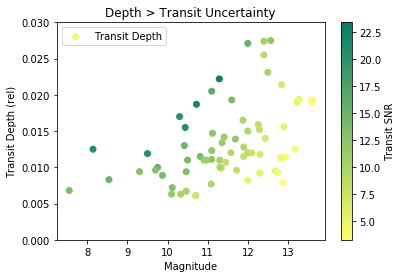

In [25]:
gradient = plt.scatter(Magadray,deladray,label='Transit Depth',c=UncVdray, cmap=plt.cm.summer_r)
plt.colorbar(gradient, label = 'Transit SNR')

#ax1.scatter(Magadray,UncTdray,label='Transit Uncertainty')
plt.title("Depth > Transit Uncertainty")
plt.ylabel("Transit Depth (rel)")
plt.xlabel("Magnitude")
plt.ylim(0,.03)
plt.savefig("DepthVsTstUnc.png")
plt.legend(loc = 'upper left')
plt.show()

